In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Anti_Fraud_Centre_Data.csv")
df

,Numro d'identification / Number ID,Date Received / Date reue,Complaint Received Type,Type de plainte reue,Country,Pays,Province/State,Province/tat,Fraud and Cybercrime Thematic Categories,Catgories thmatiques sur la fraude et la cybercriminalit,...,Mthode de sollicitation,Gender,Genre,Language of Correspondence,Langue de correspondance,Victim Age Range / Tranche d'ge des victimes,Complaint Type,Type de plainte,Number of Victims / Nombre de victimes,Dollar Loss /pertes financires
0,1,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,Nova Scotia,Nouvelle-cosse,Phishing,Hameonnage,...,Messages texte,Female,Femme,English,Anglais,'30 - 39,Attempt,Tentative,0,$0.00
1,2,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,British Columbia,Colombie-Britanique,Identity Fraud,Fraude l'identit,...,Autre/inconnu,Female,Femme,English,Anglais,'70 - 79,Victim,Victime,1,$0.00
2,3,2021-01-02,CAFC Website,CAFC site web,Not Specified,Non spcifi,Not Specified,Non spcifi,Romance,Romance,...,Autre/inconnu,Not Available,non disponible,Not Available,non disponible,'Not Available / non disponible,Victim,Victime,1,$298.00
3,4,2021-01-02,CAFC Website,CAFC site web,United States,tats-Unis,California,Californie,Foreign Money Offer,Offre dargent de ltranger,...,Courrier,Male,Homme,English,Anglais,'60 - 69,Attempt,Tentative,0,$0.00
4,5,2021-01-02,CAFC Website,CAFC site web,Canada,Canada,Ontario,Ontario,Merchandise,Marchandise,...,Internet,Female,Femme,English,Anglais,'20 - 29,Victim,Victime,1,$50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313971,313972,2024-12-31,Phone,Tlphone,Canada,Canada,Alberta,Alberta,Service,Service,...,Appel direct,Not Available,non disponible,English,Anglais,'70 - 79,Victim,Victime,1,$0.00
313972,313973,2024-12-31,Phone,Tlphone,Canada,Canada,Ontario,Ontario,Identity Fraud,Fraude l'identit,...,Autre/inconnu,Not Available,non disponible,English,Anglais,'30 - 39,Victim,Victime,1,$0.00
313973,313974,2024-12-31,Phone,Tlphone,Canada,Canada,Quebec,Qubec,Service,Service,...,Appel direct,Male,Homme,French,Franais,'60 - 69,Victim,Victime,1,$0.00
313974,313975,2024-12-31,Phone,Tlphone,Canada,Canada,Quebec,Qubec,Extortion,Extorsion,...,Courriel,Female,Femme,French,Franais,'70 - 79,Victim,Victime,1,$0.00


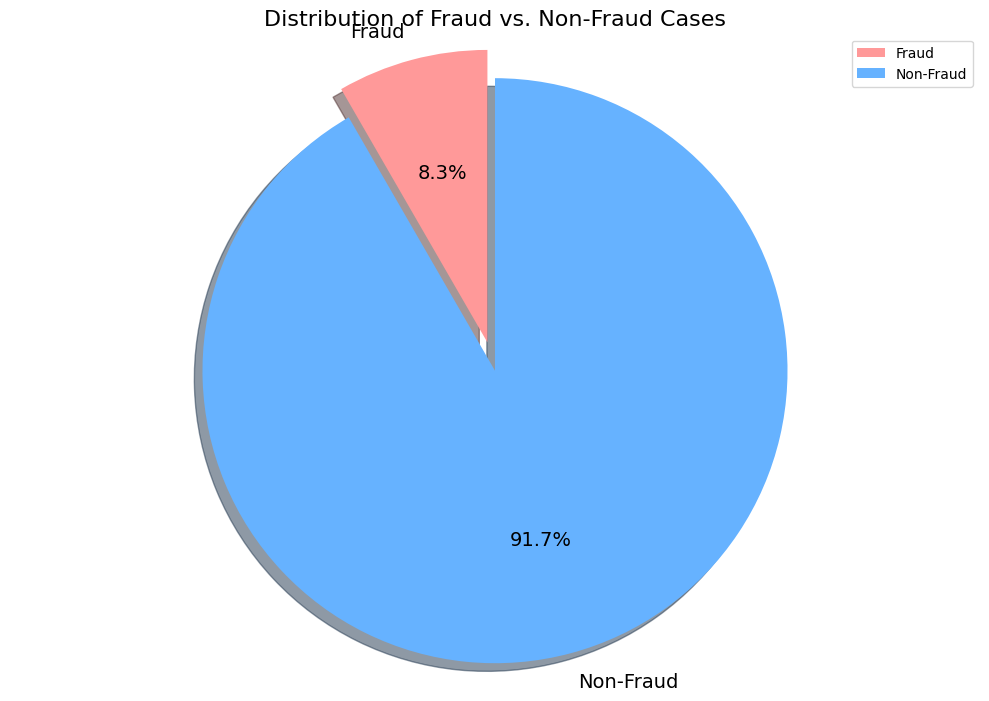

Fraud cases: 250 (8.3%)
Non-fraud cases: 2750 (91.7%)


In [3]:
fraud_count = 250      # Replace with your actual fraud count
non_fraud_count = 2750  # Replace with your actual non-fraud count

# Data for pie chart
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_count, non_fraud_count]
colors = ['#FF9999', '#66B2FF']
explode = (0.1, 0)  # explode the 1st slice (Fraud) for emphasis

# Create the pie chart
plt.figure(figsize=(10,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,
        textprops={'fontsize': 14})

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')  

# Add title
plt.title('Distribution of Fraud vs. Non-Fraud Cases', fontsize=16)

# Add legend
plt.legend(labels, loc="best")

# Show plot
plt.tight_layout()
plt.show()

# Optional: Print the actual numbers
print(f"Fraud cases: {fraud_count} ({fraud_count/(fraud_count+non_fraud_count)*100:.1f}%)")
print(f"Non-fraud cases: {non_fraud_count} ({non_fraud_count/(fraud_count+non_fraud_count)*100:.1f}%)")

In [4]:
#line chart

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Sparsh\AppData\Local\Temp\ipykernel_6540\1166881701.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Dollar Loss /pertes financires'] = df['Dollar Loss /pertes financires'].replace('[\$,]', '', regex=True).astype(float)


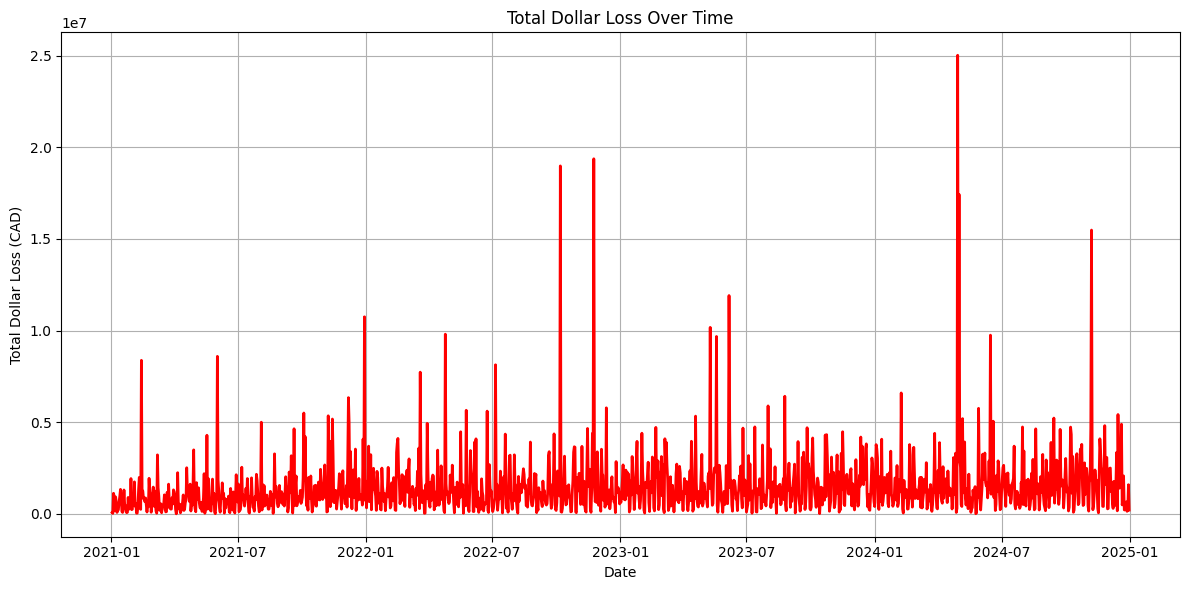

In [5]:
df = pd.read_csv("Anti_Fraud_Centre_Data.csv")

# Clean and prepare the 'Dollar Loss' column
df['Dollar Loss /pertes financires'] = df['Dollar Loss /pertes financires'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Date Received' to datetime
df['Date Received / Date reue'] = pd.to_datetime(df['Date Received / Date reue'])

# Group by date and sum dollar losses
loss_over_time = df.groupby('Date Received / Date reue')['Dollar Loss /pertes financires'].sum()

# Sort by date (in case it's not sorted)
loss_over_time = loss_over_time.sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(loss_over_time.index, loss_over_time.values, color='red', linewidth=2)
plt.title("Total Dollar Loss Over Time")
plt.xlabel("Date")
plt.ylabel("Total Dollar Loss (CAD)")
plt.grid(True)
plt.tight_layout()
plt.show()

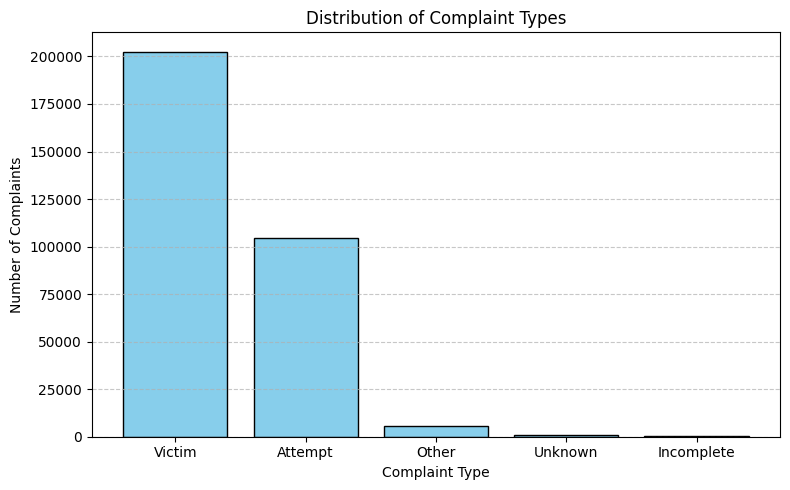

In [6]:
df = pd.read_csv("Anti_Fraud_Centre_Data.csv")

# Count complaint types
complaint_counts = df['Complaint Type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(complaint_counts.index, complaint_counts.values, color='skyblue', edgecolor='black')
plt.title("Distribution of Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()












<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Sparsh\AppData\Local\Temp\ipykernel_6540\2676026408.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Dollar Loss /pertes financires'] = df['Dollar Loss /pertes financires'].replace('[\$,]', '', regex=True).astype(float)


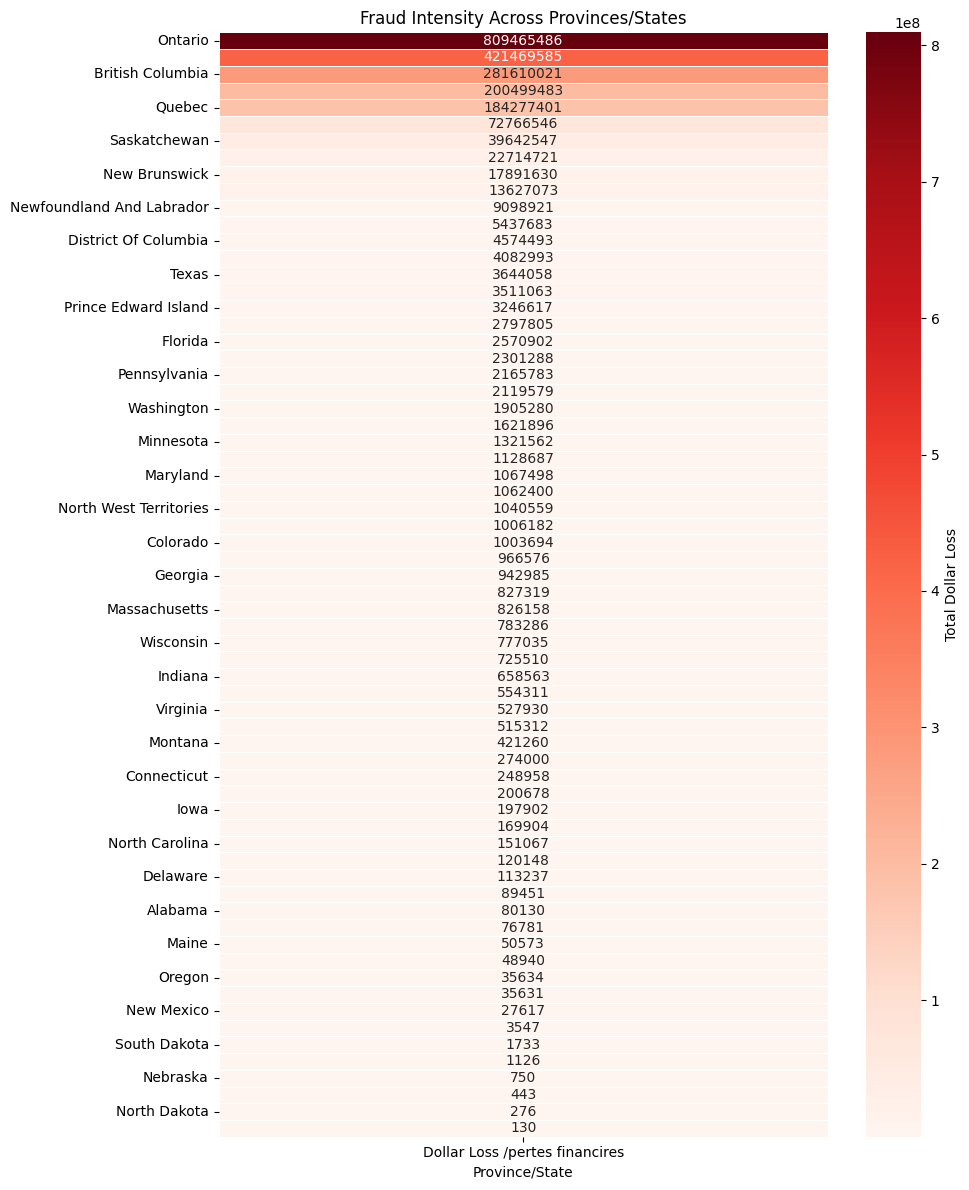

In [7]:
df = pd.read_csv("Anti_Fraud_Centre_Data.csv")

# Clean the dollar loss column
df['Dollar Loss /pertes financires'] = df['Dollar Loss /pertes financires'].replace('[\$,]', '', regex=True).astype(float)

# Group by province/state and sum the total dollar loss
province_loss = df.groupby('Province/State')['Dollar Loss /pertes financires'].sum().sort_values(ascending=False)

# Convert to DataFrame for heatmap
heatmap_data = pd.DataFrame(province_loss)

# Create a heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar_kws={'label': 'Total Dollar Loss'})
plt.title("Fraud Intensity Across Provinces/States")
plt.xlabel("Province/State")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("Anti_Fraud_Centre_Data.csv")

# 1. Fraud cases by country (Choropleth/Map)
if 'Country' in df.columns and 'Complaint Type' in df.columns:
    fraud_by_country = df[df['Complaint Type'] == 'Fraud'].groupby('Country').size().reset_index(name='Fraud Count')

    fig_choropleth = px.choropleth(
        fraud_by_country,
        locations='Country',
        locationmode='country names',
        color='Fraud Count',
        title="Fraud Cases by Country",
        color_continuous_scale='Reds'
    )
    fig_choropleth.show()
else:
    print("The dataset does not contain 'Country' or 'Case Type' columns.")


In [1]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("Anti_Fraud_Centre_Data.csv")

# Check if the required columns exist
if 'Province/State' in df.columns and 'Complaint Type' in df.columns:
    # Filter for fraud cases
    fraud_by_province = df[df['Complaint Type'] == 'Fraud'].groupby('Province/State').size().sort_values(ascending=False).head(10).reset_index(name='Fraud Count')

    # Create the bar chart
    fig_bar = px.bar(
        fraud_by_province,
        x='Province/State',
        y='Fraud Count',
        title="Top 10 Provinces with the Highest Fraud Count",
        labels={'Province/State': 'Province/State', 'Fraud Count': 'Fraud Count'},
        color='Fraud Count',
        color_continuous_scale='Blues'
    )
    fig_bar.show()
else:
    print("The dataset does not contain 'Province/State' or 'Case Type' columns.")